In [ ]:
# Installing necessary libraries

import math
import numpy as np
import pandas_datareader as web
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get stock quotes 

df = web.DataReader('CHK', data_source='yahoo', start='2021-02-01', end='2021-05-08')

# Show dataframe 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-10,50.000000,43.000000,43.000000,44.990002,1836900,44.990002
2021-02-11,45.470001,42.750000,45.470001,42.799999,1652100,42.799999
2021-02-12,43.500000,41.549999,43.009998,42.509998,2088200,42.509998
2021-02-16,45.540001,43.009998,44.200001,43.549999,1369100,43.549999
2021-02-17,44.599998,43.500000,44.029999,44.259998,1910200,44.259998
...,...,...,...,...,...,...
2021-05-03,46.619999,45.410000,45.970001,46.360001,870300,46.360001
2021-05-04,46.500000,45.599998,46.500000,46.000000,772200,46.000000
2021-05-05,47.630001,46.095001,46.230000,46.740002,1923400,46.740002


In [ ]:
# Get the number of rows and columns

df.shape

(61, 6)

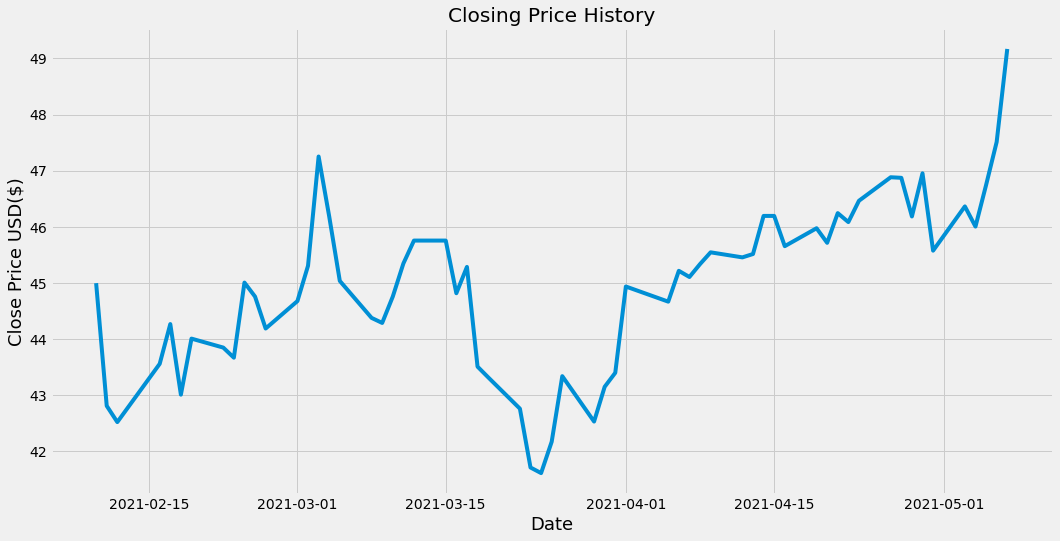

In [ ]:
# Visualize the closing the price

plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only Close variable

data= df.filter(['Close'])

# Convert the dataframe to numpy array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

49

In [ ]:
# Scale the data 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.44782078],
       [0.15852058],
       [0.12021135],
       [0.25759588],
       [0.35138705],
       [0.18494076],
       [0.31704117],
       [0.29590512],
       [0.27212701],
       [0.44914157],
       [0.41611647],
       [0.34081928],
       [0.40554819],
       [0.48877159],
       [0.74636747],
       [0.60502008],
       [0.45310442],
       [0.36591817],
       [0.35402912],
       [0.41611647],
       [0.49405572],
       [0.54821687],
       [0.54821687],
       [0.42404267],
       [0.48612952],
       [0.25099096],
       [0.22589207],
       [0.15191566],
       [0.01321034],
       [0.        ],
       [0.07397641],
       [0.22853414],
       [0.12153263],
       [0.20343474],
       [0.23645984],
       [0.43989458],
       [0.40422741],
       [0.47688253],
       [0.46235141],
       [0.49273494],
       [0.5204759 ],
       [0.50858685],
       [0.51651255],
       [0.60634086],
       [0.60634086],
       [0.53500703],
       [0.57727912],
       [0.542

In [ ]:
# Create the training dataset
# Create train scaled data 
train_data = scaled_data[0:training_data_len, :]
#Split data into x_train and y_train datasets

x_train =[]
y_train =[]

for i in range (30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i,0])
  if i<= 31:
    print(x_train)
    print(y_train)
    print()



[array([0.44782078, 0.15852058, 0.12021135, 0.25759588, 0.35138705,
       0.18494076, 0.31704117, 0.29590512, 0.27212701, 0.44914157,
       0.41611647, 0.34081928, 0.40554819, 0.48877159, 0.74636747,
       0.60502008, 0.45310442, 0.36591817, 0.35402912, 0.41611647,
       0.49405572, 0.54821687, 0.54821687, 0.42404267, 0.48612952,
       0.25099096, 0.22589207, 0.15191566, 0.01321034, 0.        ])]
[0.07397640632322666]

[array([0.44782078, 0.15852058, 0.12021135, 0.25759588, 0.35138705,
       0.18494076, 0.31704117, 0.29590512, 0.27212701, 0.44914157,
       0.41611647, 0.34081928, 0.40554819, 0.48877159, 0.74636747,
       0.60502008, 0.45310442, 0.36591817, 0.35402912, 0.41611647,
       0.49405572, 0.54821687, 0.54821687, 0.42404267, 0.48612952,
       0.25099096, 0.22589207, 0.15191566, 0.01321034, 0.        ]), array([0.15852058, 0.12021135, 0.25759588, 0.35138705, 0.18494076,
       0.31704117, 0.29590512, 0.27212701, 0.44914157, 0.41611647,
       0.34081928, 0.40554819, 0.

In [ ]:
#Convert x_train and y_train dataset to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(19, 30, 1)

In [ ]:
# Build the LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

19/19 [==============================] - 3s 14ms/step - loss: 0.1420


In [ ]:
# Create the testing dataset
# Create a new array for test

test_data = scaled_data[training_data_len-30:df.shape[0], :]
# Create x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range (30, len(test_data)):
  x_test.append(test_data[i-30:i, :])

In [ ]:
# Convert the data to a numpy array

x_test=np.array(x_test)

In [ ]:
# Reshape the data 

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(12, 30, 1)

In [ ]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Evaluate the model using the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.2330970764160156

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


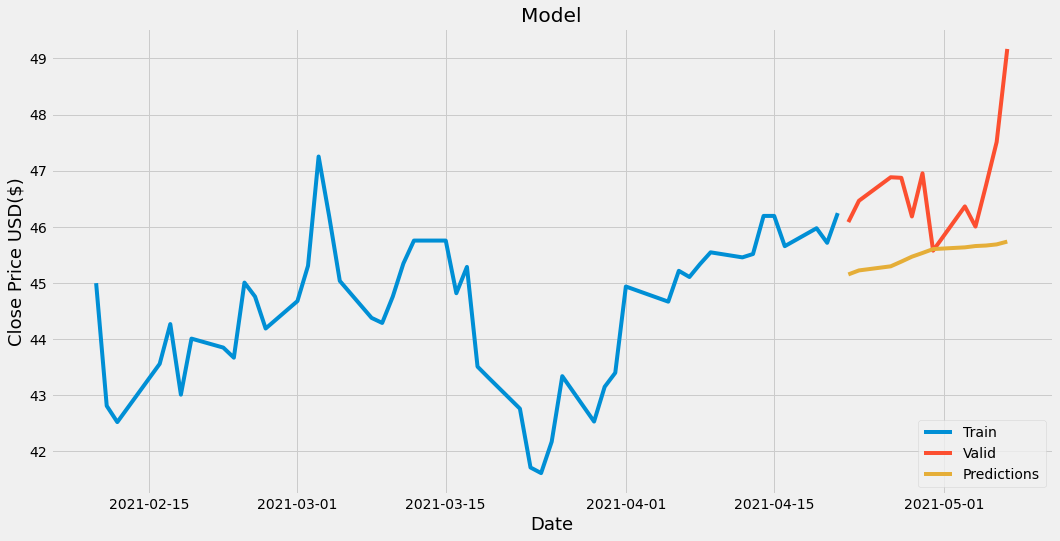

In [ ]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the model

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-04-22,46.080002,45.145840
2021-04-23,46.459999,45.217144
2021-04-26,46.880001,45.290443
2021-04-27,46.869999,45.374493
2021-04-28,46.180000,45.462242
2021-04-29,46.950001,45.528629
2021-04-30,45.570000,45.598145
2021-05-03,46.360001,45.628811
2021-05-04,46.000000,45.652348


In [ ]:
# Get the quote 

chk_quote = web.DataReader('CHK', data_source='yahoo', start='2021-02-01', end='2021-05-08')

# Create a new dataframe

new_df = chk_quote.filter(['Close'])

# Get the last 30 days pricing values and convert to a numpy array

last_30_days = new_df[-30:].values

# Scale the data between 0 and 1

last_30_days_scaled = scaler.transform(last_30_days)

# Create an empty list

X_test = []

# Append the past the 30 days

X_test.append(last_30_days_scaled)

# Convert the X_test to numpy array

X_test = np.array(X_test)

# Reshape the data

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))

# Predict the price

pred_price = model.predict(X_test)

# Undo the scaling

pred_price = scaler.inverse_transform(pred_price)

# Print the predicting

print (pred_price)

[[45.846024]]
